# CSO QaQc: Large and Frequent Depth Values

In this notebook I'm going to explore large `depth` values as well as values that may be quite frequent. These frequent values can be potentially adding some sort of bias to our data so it is worth exploring.

In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Import necessary packages, may need more or less as I go.

In [2]:
CSO_CA = gpd.read_file('CSO_CA.geojson')
CSO_CA['timestamp'] = pd.to_datetime(CSO_CA.timestamp)

We are going to use the California domain to begin our exploration, just for the sake of simplicity. We'll also add a `flag` column to data frame like we usually do when sorting through cso data.

In [3]:
CSO_CA['flags'] = False
CSO_CA

,id,author,depth,source,timestamp,elevation,geometry,flags
0,qi3PPSnQ,Brandon Schwartz,234.000000,SnowPilot,2017-01-02 23:43:42+00:00,2414.250977,POINT (-120.35359 39.36812),False
1,2ZNehL12,Andy Anderson,170.000000,SnowPilot,2017-01-05 23:15:22+00:00,2204.346436,POINT (-120.23536 39.22963),False
2,/c2MfVDw,Andy Anderson,212.000000,SnowPilot,2017-01-07 03:30:39+00:00,2453.741699,POINT (-120.36517 39.35684),False
3,agjWJrxV,Brandon Schwartz,205.000000,SnowPilot,2017-01-11 23:58:35+00:00,2092.592285,POINT (-120.29299 39.34429),False
4,0nxaaHLX,Andy Anderson,505.000000,SnowPilot,2017-01-13 01:57:59+00:00,2424.332275,POINT (-120.25981 39.23891),False
...,...,...,...,...,...,...,...,...
412,MRe9TADy,Yunqing Cao,368.999986,MountainHub,2019-04-21 00:23:11.476000+00:00,2248.087646,POINT (-120.21737 38.62686),False
413,s9m3kkTq,Yunqing Cao,370.999986,MountainHub,2019-04-21 00:25:31.330000+00:00,2247.337402,POINT (-120.21720 38.62713),False
414,3muH06T8,Alexander Wong,200.000000,MountainHub,2019-05-11 22:52:38.848000+00:00,2249.148193,POINT (-120.21753 38.62687),False
415,4pmY8RAI,Alexander Wong,217.000000,MountainHub,2019-05-11 22:54:49.887001+00:00,2249.259766,POINT (-120.21756 38.62685),False


### We will add three distinct `depth` measurements to look for and see how frequent they are. These measurements are:

* 240 cm or `Depth1` this is the usual snow probe length that you can buy for retail.

* 300 cm or `Depth2` considered more professional however still can be bought.

* 330 cm or `Depth3` Dave had reportedly used this length of snow probe before.

* I've also thrown in a `DELTA` value for all of the tests to test for a small range in the cases in which there is a round off error

In [4]:
Depth1 = 240
Depth2 = 300
Depth3 = 330
DELTA = 1

`Depth1` tests for California

In [5]:
CSO_CA.loc[(CSO_CA['depth'].between(Depth1 - DELTA, Depth1 + DELTA)), 'flags'] = True
CSO_CADepth1 = CSO_CA.loc[CSO_CA['flags'] == True]
CSO_CADepth1

,id,author,depth,source,timestamp,elevation,geometry,flags
28,q1jTwQxR,Logan Talbott,240.0,SnowPilot,2017-02-12 02:01:57+00:00,2130.639404,POINT (-120.17395 39.25671),True
393,GPAFfWUr,Benjamin Hatchett,240.0,MountainHub,2019-03-23 17:05:35.131001+00:00,2378.812500,POINT (-119.91522 38.95086),True


`Depth2` tests for California

In [6]:
CSO_CA['flags'] = False
CSO_CA.loc[(CSO_CA['depth'].between(Depth2 - DELTA, Depth2 + DELTA)), 'flags'] = True
CSO_CADepth2 = CSO_CA.loc[CSO_CA['flags'] == True]
CSO_CADepth2

,id,author,depth,source,timestamp,elevation,geometry,flags
29,y8XlLEr/,Aaron Liimatainen,300.000000,SnowPilot,2017-02-12 03:59:22+00:00,2437.014160,POINT (-119.98492 38.78380),True
39,4YLCFydh,Nick Schiestel,300.000000,SnowPilot,2017-02-20 05:18:11+00:00,2398.224854,POINT (-120.36093 39.34935),True
45,dRl+lUFS,Daniel Ellsworth,299.999989,MountainHub,2017-02-24 19:09:05.691000+00:00,2673.681885,POINT (-119.91456 39.31951),True
236,BNrZdbdy,Andy Anderson,300.000000,SnowPilot,2018-03-24 00:42:14+00:00,2680.141846,POINT (-119.91744 39.31752),True
385,j+RX9nCS,Andy Anderson,300.000000,SnowPilot,2019-02-19 21:00:00+00:00,2241.675293,POINT (-120.31284 39.30204),True
392,DNVMNHVS,Dan McEvoy,300.000000,MountainHub,2019-03-15 19:44:12.853000+00:00,2160.469971,POINT (-120.32355 39.31506),True
411,IgtHYuGD,David Miller,300.000000,SnowPilot,2019-04-03 19:00:00+00:00,2223.294678,POINT (-120.24971 39.15719),True


`Depth3` tests for California

In [7]:
CSO_CA['flags'] = False
CSO_CA.loc[(CSO_CA['depth'].between(Depth3 - DELTA, Depth3 + DELTA)), 'flags'] = True
CSO_CADepth3 = CSO_CA.loc[CSO_CA['flags'] == True]
CSO_CADepth3

,id,author,depth,source,timestamp,elevation,geometry,flags
340,WLc5wmSI,Logan Talbott,330.0,SnowPilot,2019-01-19 19:15:00+00:00,2114.563721,POINT (-120.28033 39.20698),True


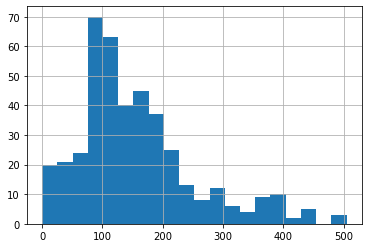

In [8]:
histogram_CA = CSO_CA['depth'].hist(bins = 20)

Looking at the Data frames we don't see too many values that fit these criteria. An interesting thing to note is that many of these values come from SnowPilot, which is the place I least expected to see a some form of snowprobe length bias... However the total number of observations that fit this discription is so low that maybe assessing this as a "bias" might not be worth it, as this bias would really only matter for observations from `MountainHub` as that is where large values could be limited due to snow probe length.

In [9]:
CSO_CA['flags'] = False
CSO_CA.loc[CSO_CA['depth'] >= Depth1, 'flags'] = True
CSO_CALarge = CSO_CA.loc[CSO_CA['flags'] == True]
CSO_CALarge

,id,author,depth,source,timestamp,elevation,geometry,flags
4,0nxaaHLX,Andy Anderson,505.000000,SnowPilot,2017-01-13 01:57:59+00:00,2424.332275,POINT (-120.25981 39.23891),True
5,Au9qTV6b,Andy Anderson,480.000000,SnowPilot,2017-01-14 23:12:02+00:00,2710.246338,POINT (-119.91763 39.31836),True
8,oet84bMT,Steve Reynaud,274.000000,SnowPilot,2017-01-17 23:13:58+00:00,2183.887939,POINT (-120.20480 39.12448),True
9,GlJw5m7U,Steve Reynaud,365.000000,SnowPilot,2017-01-21 22:17:09+00:00,2321.106934,POINT (-120.11362 38.96988),True
12,jjwHoZjv,Devin Hiemstra,435.000000,SnowPilot,2017-01-23 23:06:05+00:00,2750.744141,POINT (-119.88223 39.31639),True
...,...,...,...,...,...,...,...,...
392,DNVMNHVS,Dan McEvoy,300.000000,MountainHub,2019-03-15 19:44:12.853000+00:00,2160.469971,POINT (-120.32355 39.31506),True
393,GPAFfWUr,Benjamin Hatchett,240.000000,MountainHub,2019-03-23 17:05:35.131001+00:00,2378.812500,POINT (-119.91522 38.95086),True
411,IgtHYuGD,David Miller,300.000000,SnowPilot,2019-04-03 19:00:00+00:00,2223.294678,POINT (-120.24971 39.15719),True
412,MRe9TADy,Yunqing Cao,368.999986,MountainHub,2019-04-21 00:23:11.476000+00:00,2248.087646,POINT (-120.21737 38.62686),True


In [10]:
CSO_CALarge[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,13
SnowPilot,51


In [11]:
CSO_CALarge.loc[CSO_CALarge['source'] == "MountainHub"]

,id,author,depth,source,timestamp,elevation,geometry,flags
23,8gmiFej+,Daniel Ellsworth,380.999994,MountainHub,2017-01-31 21:55:45.584999+00:00,2624.447021,POINT (-119.92518 39.29475),True
37,d8aMh5rZ,Daniel Ellsworth,365.759995,MountainHub,2017-02-18 22:03:59.328999+00:00,2706.513672,POINT (-120.00965 38.68463),True
45,dRl+lUFS,Daniel Ellsworth,299.999989,MountainHub,2017-02-24 19:09:05.691000+00:00,2673.681885,POINT (-119.91456 39.31951),True
60,vbYRUwlX,Daniel Ellsworth,380.999994,MountainHub,2017-03-25 17:52:31.364000+00:00,2414.438721,POINT (-120.36314 39.35454),True
61,yvDqGAqI,Mikey Johnson,275.000000,MountainHub,2017-04-09 21:15:02.640000+00:00,1943.306274,POINT (-120.25224 39.31306),True
63,i4rlygBd,Mikey Johnson,290.000000,MountainHub,2017-04-14 20:44:40.327000+00:00,2094.141113,POINT (-120.29861 39.31149),True
97,lfPcDv/L,David Galson,254.000000,MountainHub,2017-11-30 23:56:29.228001+00:00,2246.568604,POINT (-120.31776 39.30878),True
359,DjWiOHzp,Benjamin Hatchett,247.000000,MountainHub,2019-01-24 23:19:56.796001+00:00,2484.592041,POINT (-119.87735 39.32426),True
380,uPCwEood,Neil Lareau,260.000000,MountainHub,2019-02-16 16:39:20.454000+00:00,2001.947876,POINT (-120.23591 39.34554),True
392,DNVMNHVS,Dan McEvoy,300.000000,MountainHub,2019-03-15 19:44:12.853000+00:00,2160.469971,POINT (-120.32355 39.31506),True


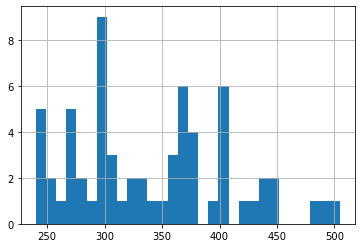

In [12]:
histogram_CA = CSO_CALarge['depth'].hist(bins = 30)

The only value that seems to be somewhat biased is our `Depth3` of 300 cm. However when considering how many actually fit this discription compared to the number of total observations (417) and the number of observation greater than 300 cm (about ~ 40) it's difficult to conclude on how impactful this could be. However it's worth still mentioning that the value of 300 cm could be underestimates of said observation.

In [13]:
CSO_CALarge[['source', 'depth']].groupby(['source']).agg(['count', 'max'])

depth            
            count         max
source                       
MountainHub    13  380.999994
SnowPilot      51  505.000000

I think it's safe to assume that atleast for the region of California that we don't see anything notable with snowprobe bias. I actually feel as though the large CSO values in California are somewhat reliable in a qualitative sense. The observations appear to be exact and most of them come from `SnowPilot`. None of the `MountainHub` values are extremely large, maxing out at around 380.9 which feels pretty grounded in reality. It's difficult to truly assess these max values without some form of large Climatology, which is what this will eventually transition to for Alaska.

## Snow Probe bias and large depth exploration in the entire CSO dataset.

We are now going to extend our exploration to the entire dataset using `CSOgeodata.txt`.

In [14]:
CSO_gdf = gpd.read_file('CSOgeodata.geojson')
CSO_gdf['timestamp'] = pd.to_datetime(CSO_gdf.timestamp)
CSO_gdf['flags'] = False
CSO_gdf

,id,author,depth,source,timestamp,elevation,geometry,flags
0,4J5z5w7h,camila chamizo,150.0,SnowPilot,2021-06-28 20:15:00+00:00,1881.618530,POINT (-71.56655 -41.10209),False
1,2C8R7ehK,camila chamizo,150.0,SnowPilot,2021-06-28 18:15:00+00:00,1881.618530,POINT (-71.56655 -41.10209),False
2,a3a3VCXY,juan manuel raselli,155.0,SnowPilot,2021-06-26 20:00:00+00:00,1577.167603,POINT (-72.93703 -49.07451),False
3,ImH60r2U,John Soltys,90.0,MountainHub,2021-06-26 15:12:30.931999+00:00,1585.094727,POINT (-121.40983 47.45218),False
4,mebZPRGY,Roberto indio Treu,400.0,SnowPilot,2021-06-25 15:00:00+00:00,1568.316284,POINT (-72.93789 -49.07159),False
...,...,...,...,...,...,...,...,...
30492,H2E/jXmC,aask@nve,18.0,regObs,1975-03-04 16:30:00+00:00,851.000000,POINT (8.94487 61.78813),False
30493,caoWAbeB,aask@nve,49.0,regObs,1974-03-08 15:50:00+00:00,984.000000,POINT (8.74345 61.49456),False
30494,f63KW/A1,aask@nve,32.0,regObs,1974-03-08 12:20:00+00:00,851.000000,POINT (8.94487 61.78813),False
30495,m+lrqT6a,aask@nve,9.0,regObs,1974-03-08 10:40:00+00:00,362.000000,POINT (8.94222 61.85313),False


`Depth1` test of the entire CSO database.

In [15]:
CSO_gdf.loc[(CSO_gdf['depth'].between(Depth1 - DELTA, Depth1 + DELTA)), 'flags'] = True
CSO_gdfDepth1 = CSO_gdf.loc[CSO_gdf['flags'] == True]
CSO_gdfDepth1.head(10)

,id,author,depth,source,timestamp,elevation,geometry,flags
11,3ohEyHZz,John Soltys,240.0,MountainHub,2021-06-19 16:58:53.236000+00:00,1557.459717,POINT (-121.33946 47.41605),True
158,888uTpqm,LeneP@forsvaret,240.0,regObs,2021-05-07 16:13:40+00:00,819.112305,POINT (13.85311 66.92991),True
280,qIUc62jK,Oskar Brodén,240.0,SnowPilot,2021-04-30 08:50:00+00:00,816.223755,POINT (12.37369 63.18515),True
288,HNldovFl,Eldbjorg@MET,240.0,regObs,2021-04-29 12:05:21+00:00,1594.138672,POINT (8.74299 61.40751),True
292,mCcdloKu,Abisko Nuolja,240.0,SnowPilot,2021-04-29 08:00:00+00:00,899.648071,POINT (18.71993 68.36674),True
335,YYMh7f+V,Patrik@ObsKorps,240.0,regObs,2021-04-27 13:47:20+00:00,617.804688,POINT (20.15899 69.55024),True
340,GTOLasy9,ÅgeMidthun@obskorps,239.0,regObs,2021-04-27 10:30:31+00:00,1027.297485,POINT (6.67883 59.79969),True
344,2xqVTDec,Stefan Hedlund,240.0,SnowPilot,2021-04-27 08:50:00+00:00,755.018799,POINT (19.62015 68.18868),True
405,yZRFRI8Q,Patrik@ObsKorps,240.0,regObs,2021-04-23 15:02:11+00:00,960.535950,POINT (20.13002 69.54445),True
491,qRH/n0+H,Mike Caccavano,240.0,MountainHub,2021-04-18 18:12:19.197001+00:00,1693.384399,POINT (-121.85374 44.34124),True


In [16]:
CSO_gdfDepth1[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,32
SnowPilot,81
regObs,72


`Depth2` test of the entire CSO database.

In [17]:
CSO_gdf['flags'] = False
CSO_gdf.loc[(CSO_gdf['depth'].between(Depth2 - DELTA, Depth2 + DELTA)), 'flags'] = True
CSO_gdfDepth2 = CSO_gdf.loc[CSO_gdf['flags'] == True]
CSO_gdfDepth2.head(10)

,id,author,depth,source,timestamp,elevation,geometry,flags
89,+48ZoiV0,Tim Nordström,300.0,SnowPilot,2021-05-15 09:30:00+00:00,1041.592529,POINT (18.41078 68.41363),True
173,MzJoVeCw,Tim Nordström,300.0,SnowPilot,2021-05-07 08:25:00+00:00,1124.216187,POINT (18.34678 68.36681),True
183,O7Lyn20Q,ÅgeMidthun@obskorps,300.0,regObs,2021-05-06 11:50:16+00:00,1232.489014,POINT (6.69963 59.74176),True
204,z2J9/6tu,Martin_S@obskorps,300.0,regObs,2021-05-04 14:21:11+00:00,773.174561,POINT (19.12347 69.51993),True
236,CoaWX32J,brit-siv@obskorps,300.0,regObs,2021-05-02 11:56:13+00:00,1198.176758,POINT (6.60883 61.58259),True
253,nNUZST2u,John Wilcoxen,300.0,SnowPilot,2021-05-01 10:36:00+00:00,1205.220825,POINT (12.37101 62.57525),True
425,T+2TpDbU,StigR@Obskorps,300.0,regObs,2021-04-22 14:07:58+00:00,527.561646,POINT (21.61498 69.87788),True
495,szaVlNRh,StigR@Obskorps,300.0,regObs,2021-04-18 14:48:28+00:00,764.049255,POINT (20.59701 69.72438),True
524,aKH49C1w,Hugh Barnard,300.0,SnowPilot,2021-04-16 20:00:00+00:00,1302.473755,POINT (-152.22163 61.66883),True
536,Vr3skRKu,Patrik@ObsKorps,300.0,regObs,2021-04-16 14:27:17+00:00,805.959961,POINT (19.95529 69.61960),True


In [18]:
CSO_gdfDepth2[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,33
SnowPilot,115
regObs,154


`Depth3` test of the entire CSO database.

In [19]:
CSO_gdf['flags'] = False
CSO_gdf.loc[(CSO_gdf['depth'].between(Depth3 - DELTA, Depth3 + DELTA)), 'flags'] = True
CSO_gdfDepth3 = CSO_gdf.loc[CSO_gdf['flags'] == True]
CSO_gdfDepth3.head(10)

,id,author,depth,source,timestamp,elevation,geometry,flags
822,1cvgevMZ,Bret Shandro,330.000000,SnowPilot,2021-04-06 18:23:00+00:00,1139.530151,POINT (-127.84783 53.59061),True
2613,th4vlc3k,Phillip Raymond Wilson,330.199995,MountainHub,2021-02-21 23:14:38.020000+00:00,908.068420,POINT (-145.72859 63.41740),True
4326,S5kjsNHo,Katie Johnston,330.000000,SnowPilot,2021-01-27 19:00:00+00:00,1169.287964,POINT (-121.09499 47.73072),True
8205,ne7uVJsy,ÅgeMidthun@obskorps,330.000000,regObs,2020-04-19 14:24:31+00:00,1052.395874,POINT (6.21354 59.59951),True
8570,LkeAVJS2,Ali@nortind,330.000000,regObs,2020-03-31 13:08:17+00:00,1128.747803,POINT (7.34763 61.52512),True
8608,xf7PVSPr,andrea@regobsTroms,330.000000,regObs,2020-03-29 14:26:00+00:00,289.259827,POINT (19.13194 69.57479),True
8637,Adv0uKif,Tyler Curtis,330.000000,SnowPilot,2020-03-28 09:30:00+00:00,826.590759,POINT (15.47824 65.21440),True
8832,5zuoMgTk,JonasD@Obskorps,330.000000,regObs,2020-03-20 09:44:58+00:00,380.986359,POINT (14.39169 68.23110),True
9178,ve6obYXy,Whitewater Ski Patrol,330.000000,SnowPilot,2020-03-09 17:45:00+00:00,1649.599365,POINT (-117.14675 49.45875),True
12207,uv8wj2fe,Ryan Zarter,330.000000,SnowPilot,2019-03-29 17:45:00+00:00,3675.405762,POINT (-105.93117 39.67858),True


In [20]:
CSO_gdfDepth3[['depth','source']].groupby(['source']).agg(['count'])

,depth
,count
source,
MountainHub,9
SnowPilot,13
regObs,4


I think from this we can eliminate 330 cm as a common snow probe bias point. Interestingly `Depth2` (300 cm) is the most common depth measurement among higher depths. Also interestingly is that many of our MountainHub valus don't exceed 240 cm, which is honestly a good indication of the validity of the data as most citizen scientists don't own snow probes larger than 240 or 300 cm (assuming they bought them through conventional means). RegObs also comes up quite often in our exploration! We now can look at the entire dataset for large values over 240 cm.

In [21]:
CSO_gdf['flags'] = False
CSO_gdf.loc[CSO_gdf['depth'] >= Depth1, 'flags'] = True
CSO_gdfLarge = CSO_gdf.loc[CSO_gdf['flags'] == True]
CSO_gdfLarge

,id,author,depth,source,timestamp,elevation,geometry,flags
4,mebZPRGY,Roberto indio Treu,400.0,SnowPilot,2021-06-25 15:00:00+00:00,1568.316284,POINT (-72.93789 -49.07159),True
10,pCsaTOm4,Sedgesprite,320.0,MountainHub,2021-06-19 20:27:21.664000+00:00,1290.871948,POINT (-134.30249 58.29309),True
11,3ohEyHZz,John Soltys,240.0,MountainHub,2021-06-19 16:58:53.236000+00:00,1557.459717,POINT (-121.33946 47.41605),True
28,IfRA5I2l,Davide Colombarolli,298.0,SnowPilot,2021-05-30 10:00:00+00:00,2999.862061,POINT (10.11114 46.43011),True
46,1fDihpeE,Sedgesprite,285.0,MountainHub,2021-05-25 19:12:14.573000+00:00,1029.839111,POINT (-134.54744 58.26826),True
...,...,...,...,...,...,...,...,...
27999,7FhDSF9t,JonasD@ObsKorps,240.0,regObs,2013-02-15 07:10:00+00:00,495.375671,POINT (14.39535 68.23439),True
28018,IXxokgeA,Gunne@SVV,250.0,regObs,2013-02-08 12:01:10.270000+00:00,686.725769,POINT (9.46447 62.62041),True
28236,qHqBI1y7,Markus@NVE,667.0,regObs,2012-12-12 13:37:21.440001+00:00,1285.399170,POINT (8.53040 60.89236),True
28310,jks0ELLs,jaw@nve.no,300.0,regObs,2012-04-15 14:00:00+00:00,1019.403198,POINT (6.38208 61.50836),True


In [22]:
CSO_gdfLarge[['source', 'depth']].groupby(['source']).agg(['count', 'max'])

depth             
            count          max
source                        
MountainHub   500   998.219985
SnowPilot    1071  1176.000000
regObs        702  1150.000000

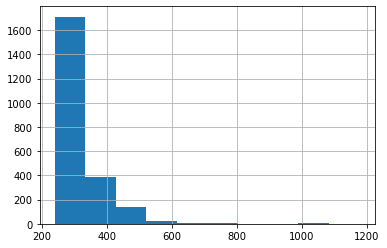

In [23]:
histogram_CA = CSO_gdfLarge['depth'].hist(bins = 10)

I think it could be worth eliminating `MountainHub` depth values larger than say 600 cm. It's already improbable that they would have a large enough snowprobe but also it's so uncommon as a datapoint that it's almost statistically impossible.

Turns out the test values of 450 cm seems like a good test values from what Gabe told me in Slack, regarding the fact that probes have difficulty measuring at depths below that.

In [24]:
Test = 450
CSO_gdfMH = CSO_gdfLarge.loc[CSO_gdfLarge['source'] == "MountainHub"]
CSO_gdfMH['flags'] = False
CSO_gdfMH.loc[CSO_gdfMH['depth'] >= Test,8 'flags'] = True
CSO_gdfMHLarge = CSO_gdfMH.loc[CSO_gdfMH['flags'] == True]
CSO_gdfMHLarge

/Users/kamrankazemi/opt/miniconda3/envs/cso_obsdata/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/kamrankazemi/opt/miniconda3/envs/cso_obsdata/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,author,depth,source,timestamp,elevation,geometry,flags
247,ReRk1HFP,Sedgesprite,450.000000,MountainHub,2021-05-01 18:47:46.042999+00:00,678.476501,POINT (-134.53420 58.27122),True
766,a6PmmcM6,Hans-Peter Marshall,452.120000,MountainHub,2021-04-07 21:02:58.158001+00:00,2309.934814,POINT (-115.68163 43.95250),True
777,5DrkTFU+,Hans-Peter Marshall,462.280000,MountainHub,2021-04-07 18:35:12.467000+00:00,2294.225098,POINT (-115.67811 43.94833),True
778,l/899Ndk,Hans-Peter Marshall,502.920000,MountainHub,2021-04-07 18:34:10.548000+00:00,2299.011475,POINT (-115.67795 43.94813),True
779,5HTXkAKs,Hans-Peter Marshall,490.220000,MountainHub,2021-04-07 18:32:33.796001+00:00,2292.080811,POINT (-115.67766 43.94771),True
...,...,...,...,...,...,...,...,...
21863,yay5W2FM,Sean Zimmerman-Wall,495.300000,MountainHub,2017-09-01 03:33:43.231998+00:00,2047.191650,POINT (-71.48495 -41.16965),True
21959,rGJklYQG,Sarah Carter,533.399992,MountainHub,2017-05-16 20:44:01.070000+00:00,829.701599,POINT (-145.72855 61.13553),True
21960,RX4/M3lp,Sarah Carter,596.899991,MountainHub,2017-05-16 20:00:02.744000+00:00,995.200684,POINT (-145.71603 61.13426),True
22370,+1dl7eCt,CJ Svela,560.000000,MountainHub,2017-04-09 17:47:33.327999+00:00,2564.387695,POINT (-121.70539 45.35839),True


We can almost certainly elimainate some of these based off of their elevations. I'll check in with Emilio before coming to any conclusions about any of this...